In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./abalone.data', delimiter=',', header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
df.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

In [7]:
df.head(2)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


In [8]:
print('N.rows:', df.shape[0], '| N.columns:', df.shape[1])

N.rows: 4177 | N.columns: 9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [10]:
df['sex'].unique()

array(['M', 'F', 'I'], dtype=object)

<Figure size 720x576 with 0 Axes>

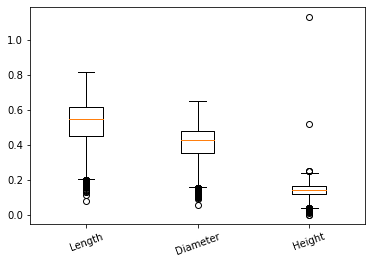

In [11]:
plt.figure(figsize=(10, 8))
fig, ax = plt.subplots()
ax.boxplot([df['length'], df['diameter'], df['height']])
plt.xticks([1,2,3], ['Length', 'Diameter', 'Height'], rotation=20)
plt.show()

Il looks like 'Height' has a couple of outliers.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
whole_weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shucked_weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
viscera_weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
shell_weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [13]:
q1 = np.quantile(df.height, 0.25)
q3 = np.quantile(df.height, 0.75)
interquartile_range = q3 - q1
outliers = []
for i in df.height:
    if i > q3 + (1.5 * interquartile_range):
        outliers.append(i)

print(outliers)

[0.515, 0.25, 0.25, 1.13, 0.25]


we will ignore the 0.25 and get rid of the other two (maybe we'll do more cleaning later on)

In [14]:
above_05_height = df['height'] < 0.5
df = df[above_05_height]

In [15]:
df.shape #just checking if we got it correctly

(4175, 9)

<Figure size 720x576 with 0 Axes>

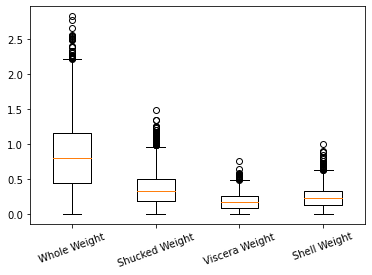

In [16]:
plt.figure(figsize=(10, 8))
fig, ax = plt.subplots()
ax.boxplot([df['whole_weight'], df['shucked_weight'], df['viscera_weight'], df['shell_weight']])
plt.xticks([1,2,3,4], ['Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight'], rotation=20)
plt.show()

In [17]:
df.sex.value_counts()

M    1527
I    1342
F    1306
Name: sex, dtype: int64

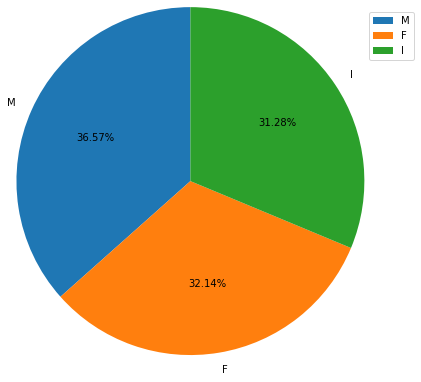

In [18]:
plt.pie(df.sex.value_counts().to_list(), labels=df.sex.unique().tolist(), autopct='%.2f%%', startangle=90, radius=2)
plt.legend(bbox_to_anchor=(1.3,1.3))
plt.show()

In [19]:
df.groupby('sex').mean()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
sex,,,,,,,,
F,0.579188,0.454809,0.157266,1.046879,0.446275,0.230776,0.302139,11.131700
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561297,0.439204,0.151143,0.990661,0.432504,0.215367,0.281819,10.705959


<AxesSubplot:>

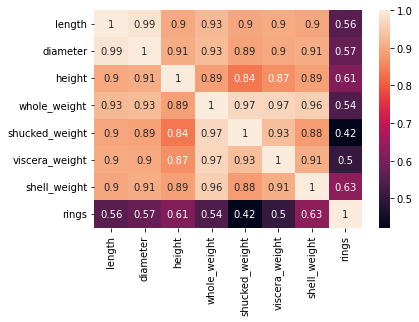

In [20]:
sns.heatmap(df.corr(), annot=True)

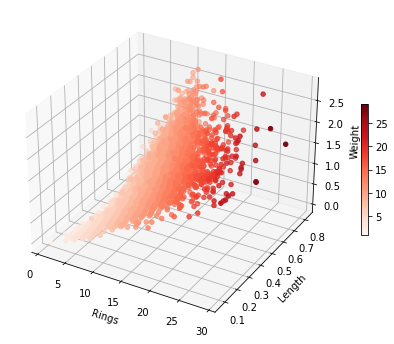

In [21]:
plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
fig = ax.scatter(df['rings'], df['length'], df['whole_weight'], c=df.rings, cmap='Reds')
ax.set_xlabel('Rings')
ax.set_ylabel('Length')
ax.set_zlabel('Weight')
plt.colorbar(fig, shrink=0.4)
plt.show()

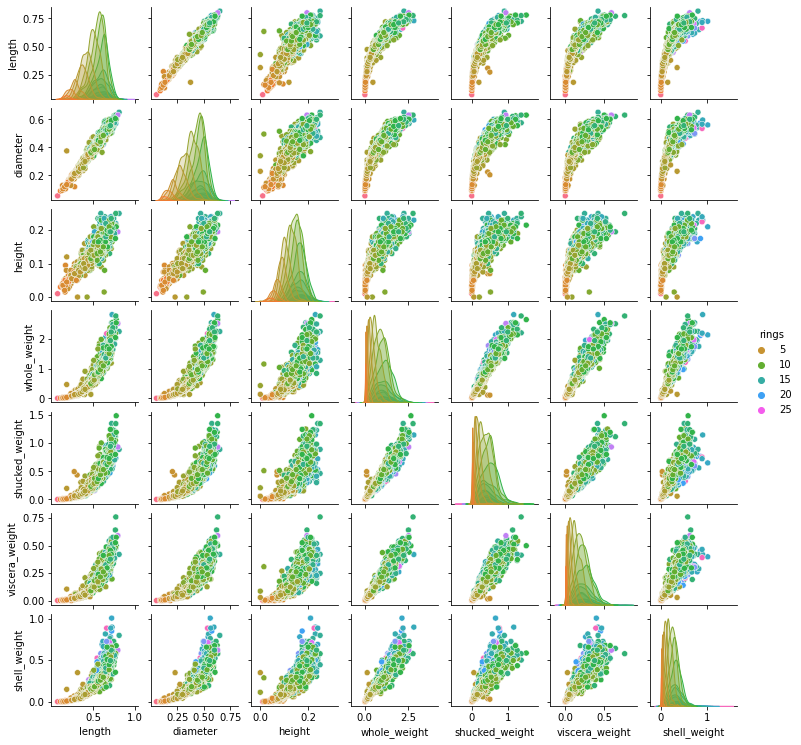

In [22]:
sns.pairplot(df, hue='rings', palette='husl', height=1.5)

## Linear Regression

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

HEIGHT
Train accuracy: 37.19474956849883 %
Test accuracy: 37.02340303106559 %
Error: 2.5900140036750856
R2 score:  0.37023403031065594


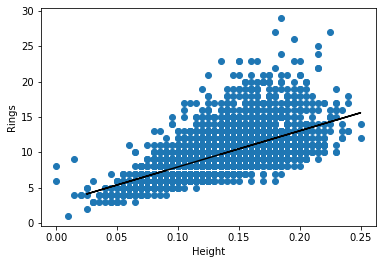

WHOLE_WEIGHT
Train accuracy: 29.273509153917576 %
Test accuracy: 29.140933565602857 %
Error: 2.747326218316148
R2 score:  0.29140933565602856


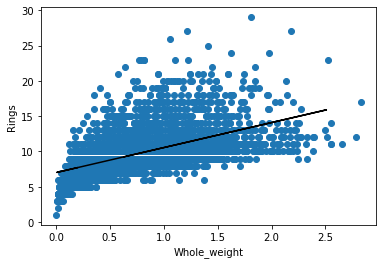

DIAMETER
Train accuracy: 32.68168524315536 %
Test accuracy: 34.39461257529326 %
Error: 2.6435179876469888
R2 score:  0.3439461257529326


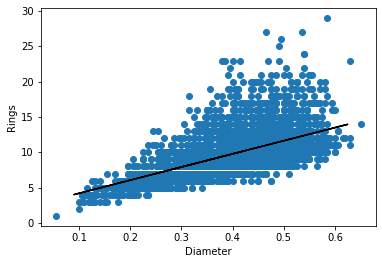

In [24]:
def lin_reg(feature):
    x = df[feature].values
    y = df['rings'].values
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    errors = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(feature.upper())
    print(f'Train accuracy: {model.score(x_train, y_train)*100} %')
    print(f'Test accuracy: {model.score(x_test, y_test)*100} %')
    print('Error:', sqrt(errors))
    print('R2 score: ', r2)

    plt.scatter(x_train, y_train)
    plt.plot(x_test, y_pred, c='black')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Rings')
    plt.show()




lin_reg('height')
lin_reg('whole_weight')
lin_reg('diameter')


In [25]:
def multi_lin_reg(df):
    df_reg = df.copy()
    x = df_reg[['height','whole_weight','shucked_weight', 'viscera_weight', 'shell_weight']]
    y = df['rings']

    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    errors = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Train accuracy: {model.score(x_train, y_train)*100} %')
    print(f'Test accuracy: {model.score(x_test, y_test)*100} %')
    print('Error:', sqrt(errors))
    print('R2: ', r2)

multi_lin_reg(df)
    


Train accuracy: 52.16565221141265 %
Test accuracy: 54.38525604877722 %
Error: 2.204271768070753
R2:  0.5438525604877722


## Random Forest Regressor

In [26]:
DICT = {'I':1, 'M':2, 'F':3}

df['enc_sex'] = df['sex'].replace(DICT)

In [35]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_regressor(df, est):
    x = df.drop(['sex', 'rings'], axis=1).values
    y = df['rings'].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=est, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(' Score: ', model.score(x_test, y_test)*100, '%\n', 'Mean squared error: ', sqrt(mean_squared_error(y_pred, y_test)))


In [36]:
for i in range(50, 101, 10):
    print('Number of estimators used: ', i)
    random_forest_regressor(df, i)

Number of estimators used:  50
 Score:  89.64299204926633 %
 Mean squared error:  1.050339437578032
Number of estimators used:  60
 Score:  89.71434265784232 %
 Mean squared error:  1.0467152308298078
Number of estimators used:  70
 Score:  89.68966659300744 %
 Mean squared error:  1.0479700529223486
Number of estimators used:  80
 Score:  89.70103824883502 %
 Mean squared error:  1.0473919706202452
Number of estimators used:  90
 Score:  89.67988999889914 %
 Mean squared error:  1.0484667948701545
Number of estimators used:  100
 Score:  89.6543948647158 %
 Mean squared error:  1.049761079176254


Creating a column with groups of 5 rings

In [33]:
group_list = []
for i in df['rings']:
    group_list.append(i // 5)

# double check to see if I got it correctly
print('N. of group 5 instances: ', group_list.count(5))

more_than_5_mask = df['rings'] > 24
print('More than 24 rings instances: ', df['rings'][more_than_5_mask].count())


N. of group 5 instances:  5
More than 24 rings instances:  5


In [34]:
df['group'] = np.array(group_list)